<a href="https://colab.research.google.com/github/jeibloo/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt

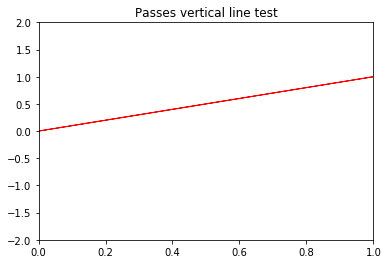

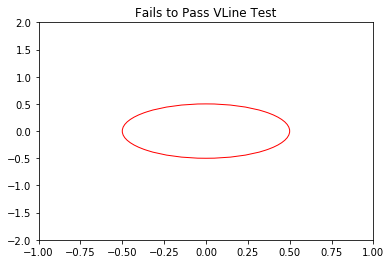

In [36]:
## Graph one is just a line
lineV = [1,1]
plt.arrow(0,0, lineV[0], lineV[1], color ='red')
plt.xlim(0,1); plt.ylim(-2,2)
plt.title("Passes vertical line test")
plt.show()

## Graph two is a circle
lineV = [0,0]
circle0 = plt.Circle((lineV[0], lineV[1]),0.5, linewidth=1, fill=False, color ='red')
fig, ax = plt.subplots()
plt.xlim(-1,1); plt.ylim(-2,2)
plt.title("Fails to Pass VLine Test")
ax.add_artist(circle0)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because they have multiple outputs

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Not functions: 1 3 4 5 because they have multiple values for x, therefore they have multiple outputs
functions: 2 there is only one value for the output

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Dimensionalities > 

m input: 3 | m output: 1

n input: 4 | n output: 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, I think. You can take a 2D line and put it in 3D space, it becomes 3D once you do so.


\begin{align}
f(𝑥_1)=(x_1,x_1)
\end{align}

I found this specific latex thingie here https://math.stackexchange.com/questions/1989389/why-cant-linear-maps-map-to-higher-dimensions#1989400

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
T_p = \begin{bmatrix}1 & 3\\ -1 & 2 \end{bmatrix}
\\
T_q = \begin{bmatrix}4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2\end{bmatrix}
\end{align}

Very funny cause I realized the numbers were out of order according to \begin{align}
x_1,x_3,x_2 ...
\end{align} but that it didn't matter...turns out they did. Columns should all have the same \begin{align}
x_n
\end{align} thingie.

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
import numpy as np

In [72]:
## 1). Manually
def p(x1, x2):
  top = x1 + 3*x2
  bottom = 2*x2 - x1
  return [top,bottom]

def q(x1,x2,x3):
  top = 4*x1+x2+2*x3
  middle = 2*x2-x1+3*x3
  bottom = 5*x1-2*x3+x2
  return [top,middle,bottom]

Tp = [[1,3],
      [-1,2]]
Tq = [[4,1,2],
      [-1,2,3],
      [5,1,-2]] 

bigQ = [0,1]
bigZ = [1,2,3]

## 2D manual then matrix mult
print("Manual:",p(bigQ[0],bigQ[1]))
print("Library:",np.matmul(Tp,bigQ))

## 3D manual then matrix mult
print("Manual:",q(bigZ[0],bigZ[1],bigZ[2]))
print("Library:",np.matmul(Tq,bigZ))

Manual: [3, 2]
Library: [3 2]
Manual: [12, 12, 1]
Library: [12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)